<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-4.010346e+05,-4.008667e+05,6.797925e+05,-1.080659e+06
1,0.0,1.0,82.957009,30.179593,86.485543,-2.134108e+05,-2.132012e+05,-1.136348e+06,9.231470e+05
2,0.0,2.0,53.642064,27.106954,25.293552,-6.746643e+04,-6.735039e+04,-2.857521e+05,2.184018e+05
3,0.0,3.0,76.201629,98.540374,49.487001,2.357599e+06,2.357834e+06,-2.967602e+05,2.654594e+06
4,0.0,4.0,46.111206,63.776428,89.112116,2.659966e+06,2.660175e+06,5.090947e+05,2.151081e+06
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,1.487118e+07,1.487139e+07,1.911841e+06,1.295955e+07
119996,999.0,116.0,92.448161,32.726045,74.654221,-1.101280e+02,9.970040e+01,1.202942e+06,-1.202843e+06
119997,999.0,117.0,81.956694,29.923322,75.141691,1.567805e+05,1.569775e+05,7.426260e+05,-5.856485e+05
119998,999.0,118.0,34.741447,82.068765,25.815578,-1.137254e+06,-1.137102e+06,5.012248e+05,-1.638326e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-4.010346e+05,-4.008667e+05,6.797925e+05,-1.080659e+06
1,0.0,1.0,82.957009,30.179593,86.485543,-2.134108e+05,-2.132012e+05,-1.136348e+06,9.231470e+05
2,0.0,2.0,53.642064,27.106954,25.293552,-6.746643e+04,-6.735039e+04,-2.857521e+05,2.184018e+05
3,0.0,3.0,76.201629,98.540374,49.487001,2.357599e+06,2.357834e+06,-2.967602e+05,2.654594e+06
4,0.0,4.0,46.111206,63.776428,89.112116,2.659966e+06,2.660175e+06,5.090947e+05,2.151081e+06
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,1.487118e+07,1.487139e+07,1.911841e+06,1.295955e+07
119996,999.0,116.0,92.448161,32.726045,74.654221,-1.101280e+02,9.970040e+01,1.202942e+06,-1.202843e+06
119997,999.0,117.0,81.956694,29.923322,75.141691,1.567805e+05,1.569775e+05,7.426260e+05,-5.856485e+05
119998,999.0,118.0,34.741447,82.068765,25.815578,-1.137254e+06,-1.137102e+06,5.012248e+05,-1.638326e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    34.926874  44.298448  ...  6.797925e+05 -1.080659e+06
      1.0    82.957009  30.179593  ... -1.136348e+06  9.231470e+05
      2.0    53.642064  27.106954  ... -2.857521e+05  2.184018e+05
      3.0    76.201629  98.540374  ... -2.967602e+05  2.654594e+06
      4.0    46.111206  63.776428  ...  5.090947e+05  2.151081e+06
...                ...        ...  ...           ...           ...
999.0 115.0  41.884209  75.626697  ...  1.911841e+06  1.295955e+07
      116.0  92.448161  32.726045  ...  1.202942e+06 -1.202843e+06
      117.0  81.956694  29.923322  ...  7.426260e+05 -5.856485e+05
      118.0  34.741447  82.068765  ...  5.012248e+05 -1.638326e+06
      119.0  22.397620  69.325109  ...  2.716425e+05 -3.792636e+05

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    34.926874  44.298448  ...  6.797925e+05 -1.080659e+06
      1.0    82.957009  30.179593  ... -1.136348e+06  9.231470e+05
      2.0    53.642064  27.106954  ... -2.857521e+05  2.184018e+05
      3.0    76.201629  98.540374  ... -2.967602e+05  2.654594e+06
      4.0    46.111206  63.776428  ...  5.090947e+05  2.151081e+06
...                ...        ...  ...           ...           ...
999.0 115.0  41.884209  75.626697  ...  1.911841e+06  1.295955e+07
      116.0  92.448161  32.726045  ...  1.202942e+06 -1.202843e+06
      117.0  81.956694  29.923322  ...  7.426260e+05 -5.856485e+05
      118.0  34.741447  82.068765  ...  5.012248e+05 -1.638326e+06
      119.0  22.397620  69.325109  ...  2.716425e+05 -3.792636e+05

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,34.926874,44.298448,78.609473,-4.010346e+05,-4.008667e+05,6.797925e+05,-1.080659e+06
1,0.0,1.0,82.957009,30.179593,86.485543,-2.134108e+05,-2.132012e+05,-1.136348e+06,9.231470e+05
2,0.0,2.0,53.642064,27.106954,25.293552,-6.746643e+04,-6.735039e+04,-2.857521e+05,2.184018e+05
3,0.0,3.0,76.201629,98.540374,49.487001,2.357599e+06,2.357834e+06,-2.967602e+05,2.654594e+06
4,0.0,4.0,46.111206,63.776428,89.112116,2.659966e+06,2.660175e+06,5.090947e+05,2.151081e+06
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,41.884209,75.626697,85.632532,1.487118e+07,1.487139e+07,1.911841e+06,1.295955e+07
119996,999.0,116.0,92.448161,32.726045,74.654221,-1.101280e+02,9.970040e+01,1.202942e+06,-1.202843e+06
119997,999.0,117.0,81.956694,29.923322,75.141691,1.567805e+05,1.569775e+05,7.426260e+05,-5.856485e+05
119998,999.0,118.0,34.741447,82.068765,25.815578,-1.137254e+06,-1.137102e+06,5.012248e+05,-1.638326e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    34.926874  44.298448  ...  6.797925e+05 -1.080659e+06
      1.0    82.957009  30.179593  ... -1.136348e+06  9.231470e+05
      2.0    53.642064  27.106954  ... -2.857521e+05  2.184018e+05
      3.0    76.201629  98.540374  ... -2.967602e+05  2.654594e+06
      4.0    46.111206  63.776428  ...  5.090947e+05  2.151081e+06
...                ...        ...  ...           ...           ...
999.0 115.0  41.884209  75.626697  ...  1.911841e+06  1.295955e+07
      116.0  92.448161  32.726045  ...  1.202942e+06 -1.202843e+06
      117.0  81.956694  29.923322  ...  7.426260e+05 -5.856485e+05
      118.0  34.741447  82.068765  ...  5.012248e+05 -1.638326e+06
      119.0  22.397620  69.325109  ...  2.716425e+05 -3.792636e+05

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

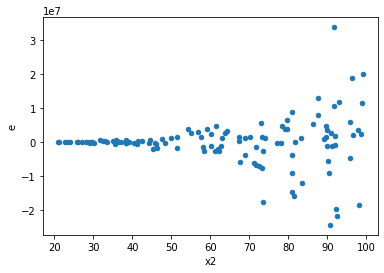

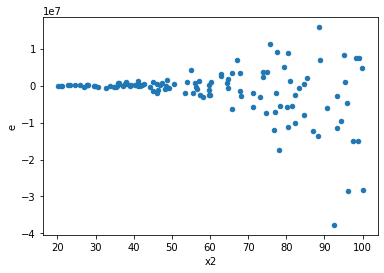

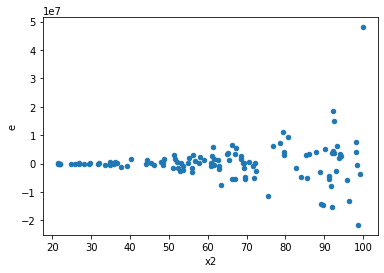

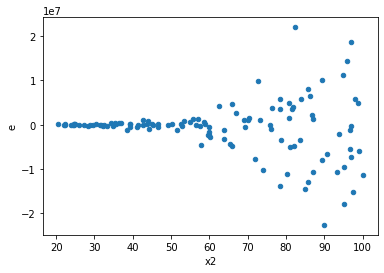

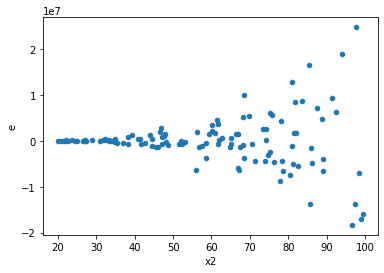

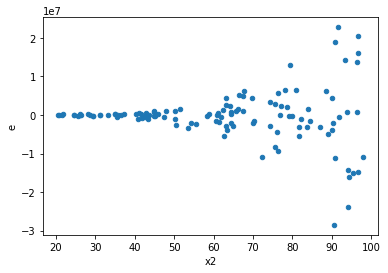

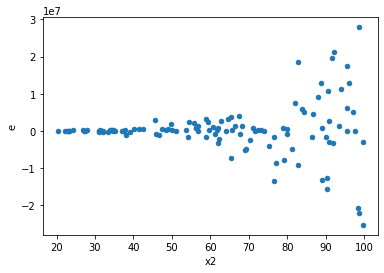

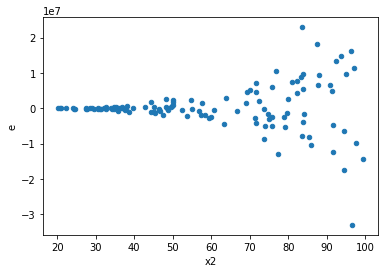

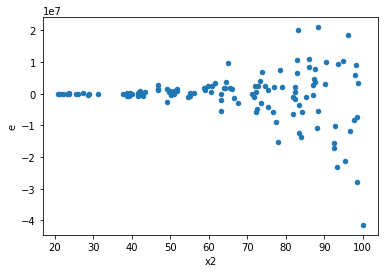

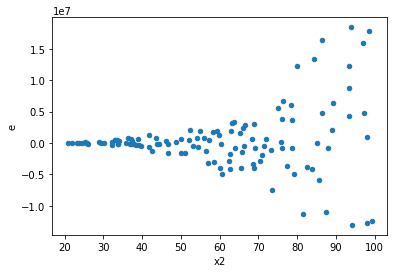

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,5383341555125789.0,37564249432559.06,122348671707404.3,853732941649.0696,143.31023876280997,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,4603189695181704.0,18984143656623.54,104617947617766.0,431457810377.8077,242.47549841815794,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4433956348500882.0,62440723808071.36,100771735193201.86,1419107359274.349,71.0106494301677,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,4184786255097704.0,8047151433717.239,95108778524947.81,182889805311.75543,520.0332427650881,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,3474643028230914.0,25562146058958.062,78969159732520.77,580957864976.3196,135.92923771802216,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,5186561775881938.0,32463397542472.82,117876403997316.77,737804489601.655,159.76644986391847,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,5291721987801478.0,25799300890222.914,120266408813669.95,586347747505.0663,205.11106135464573,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,5008449240469536.0,18447054627599.082,113828391828853.1,419251241536.3428,271.50400655160826,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,5652838978179982.0,37906491686233.89,128473613140454.14,861511174687.1339,149.125881259881,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,5383341555125789.0,37564249432559.06,122348671707404.3,853732941649.0696,143.31023876280997,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,4603189695181704.0,18984143656623.54,104617947617766.0,431457810377.8077,242.47549841815794,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4433956348500882.0,62440723808071.36,100771735193201.86,1419107359274.349,71.0106494301677,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,4184786255097704.0,8047151433717.239,95108778524947.81,182889805311.75543,520.0332427650881,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,3474643028230914.0,25562146058958.062,78969159732520.77,580957864976.3196,135.92923771802216,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,5186561775881938.0,32463397542472.82,117876403997316.77,737804489601.655,159.76644986391847,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,5291721987801478.0,25799300890222.914,120266408813669.95,586347747505.0663,205.11106135464573,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,5008449240469536.0,18447054627599.082,113828391828853.1,419251241536.3428,271.50400655160826,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,5652838978179982.0,37906491686233.89,128473613140454.14,861511174687.1339,149.125881259881,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64